In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
dataset = datasets.load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

データ毎にプロット

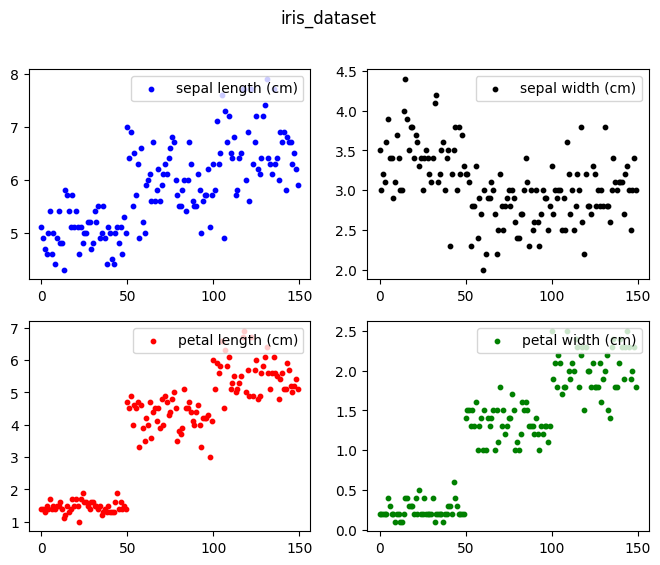

In [4]:
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = list(range(150))
y1 = dataset.data[:,0]
y2 = dataset.data[:,1]
y3 = dataset.data[:,2]
y4 = dataset.data[:,3]

ax1.scatter(x, y1, s=10, c='b', label=dataset.feature_names[0])
ax2.scatter(x, y2, s=10, c='k', label=dataset.feature_names[1])
ax3.scatter(x, y3, s=10, c='r', label=dataset.feature_names[2])
ax4.scatter(x, y4, s=10, c='g', label=dataset.feature_names[3])

ax1.legend(bbox_to_anchor=(1,1), loc='upper right')
ax2.legend(bbox_to_anchor=(1,1), loc='upper right')
ax3.legend(bbox_to_anchor=(1,1), loc='upper right')
ax4.legend(bbox_to_anchor=(1,1), loc='upper right')

fig.suptitle('iris_dataset')
plt.show()

種類毎に色分けしてプロット

In [5]:
import numpy as np

In [6]:
idx_list = []
for i in range(3):
    idx_list.append(np.where(dataset.target==i))

y_list = []
for i in range(3):
    y_list.append(dataset.data[idx_list[i],:].reshape(len(idx_list[i][0]),len(dataset.feature_names)))

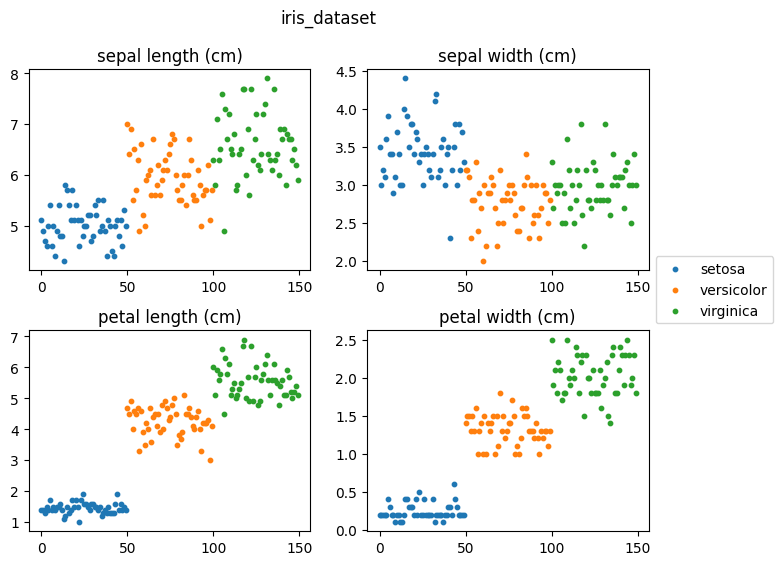

In [7]:
fig = plt.figure(figsize=(8,6))

ax = []

for i in range(4):
    ax.append(fig.add_subplot(2,2,i+1))

    for j in range(3):
        ax[i].scatter(idx_list[j][0], y_list[j][:,i], s=10, label=dataset.target_names[j])
    
    ax[i].set_title(dataset.feature_names[i])

ax[3].legend(bbox_to_anchor=(1,1), loc='lower left')

fig.suptitle('iris_dataset')
plt.subplots_adjust(hspace=0.3)
plt.show()

データ分析

In [8]:
import pandas as pd

In [9]:
lists = []
for i in range(4):
    list = []
    data = dataset.data[:,i]
    list.append(np.max(data))
    list.append(np.min(data))
    list.append(np.mean(data))
    list.append(np.median(data))
    list.append(np.std(data))
    lists.append(list)

In [12]:
df = pd.DataFrame(lists, columns=['最大値','最小値','平均値','中央値','標準偏差'], index=dataset.feature_names)
# df.to_csv('kadai2-3_basic_statistics.csv')
df

,最大値,最小値,平均値,中央値,標準偏差
sepal length (cm),7.9,4.3,5.843333,5.80,0.825301
sepal width (cm),4.4,2.0,3.057333,3.00,0.434411
petal length (cm),6.9,1.0,3.758000,4.35,1.759404
petal width (cm),2.5,0.1,1.199333,1.30,0.759693


In [15]:
# 共分散

lists = []
for i in range(4):
    list = []
    for j in range(4):
        list.append(np.cov(dataset.data[:,i], dataset.data[:,j])[0, 1])
    lists.append(list)

In [20]:
df_cov = pd.DataFrame(lists, columns=dataset.feature_names, index=dataset.feature_names)
# df_cov.to_csv('kadai2-3_covariance.csv')
df_cov

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [17]:
# 相関係数

lists = []
for i in range(4):
    list = []
    for j in range(4):
        list.append(np.corrcoef(dataset.data[:,i], dataset.data[:,j])[0, 1])
    lists.append(list)

In [19]:
df_corr = pd.DataFrame(lists, columns=dataset.feature_names, index=dataset.feature_names)
# df_corr.to_csv('kadai2-3_corrcoef.csv')
df_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000
